Value of cost function with initial parameters:  0.006187352255175626


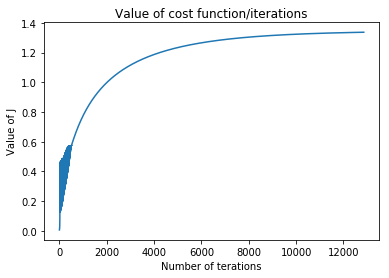

Value of cost function with minimized parameters:  1.3365321508733958
Minimized parametres theta from gradient descent [-3.83726248  0.17960343]


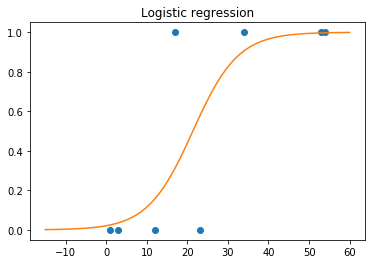

Input 1 values divided by space: 25
Probability of 'True' is 65.76463854948474%


1

In [39]:
#linear logistic regression with one variable
import numpy as np
import numpy.linalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#initial parameters of x, hypothesis and theta
X = np.array([[1,1],[1,3],[1,34],[1,12],[1,54],[1,23],[1,17],[1,53]]) 
Y = np.array([0,0,1,0,1,0,1,1])
theta = np.array([1,2])

#choose manually for every data set
eps = 0.00001
alpha = 0.02

#hypotesis
def h(theta, X):
    return 1 / (1 + np.e**(-theta.dot(X.T)))

#check on mean square(standart deviation)(cost function)
def J(t):
    return 1/len(Y) * (-Y.T.dot(np.log(h(t,X))) - (1 - Y).T.dot(np.log(h(t,X))))


#gradient descent
def gradient(X, Y, theta0, a, eps):
    delta, sigma = 10, 0
    CF = [] 
    lambd = 0
    while delta > eps:
        sigma = 1/len(Y)*sum((h(theta0, X[i]) - Y[i]) * X[i] + lambd/len(Y)*theta0 for i in range(len(Y)))

        temp = theta0[0]
        theta0 = theta0 - a * sigma
        delta = abs(theta0[0] - temp)
        CF.append(J(theta0))
    plt.plot(CF)
    plt.title('Value of cost function/iterations')
    plt.xlabel('Number of terations')
    plt.ylabel('Value of J')
    plt.show()
    return theta0




print('Value of cost function with initial parameters: ', J(theta))
grad = gradient(X, Y, theta, alpha, eps)
print('Value of cost function with minimized parameters: ', J(grad))
print('Minimized parametres theta from gradient descent', grad)

def prediction(theta):
    X = np.array([1] + list(map(int, input(f'Input {len(theta) - 1} values divided by space: ').split())))
    pred = h(theta, X)
    print(f'Probability of \'True\' is {pred*100}%')
    if pred < 0.5: return 0
    else: return 1


plt.plot(X[:,1],Y, 'o')
y = np.linspace(-15,60,65)
g = lambda x: grad.dot(np.array([1,x]).T)
z = lambda x: 1 / (1 + np.e**(-g(x)))
z = list(map(z,y))
plt.title('Logistic regression')
plt.plot(y,z)
plt.show()

prediction(grad)